In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv("..\EDA\SoranAutosData.csv")
df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,rear


In [20]:
df.columns

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive', 'car_age'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9572 entries, 0 to 9571
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9572 non-null   object 
 1   price         9572 non-null   float64
 2   body          9572 non-null   object 
 3   mileage       9572 non-null   int64  
 4   engV          9141 non-null   float64
 5   engType       9572 non-null   object 
 6   registration  9572 non-null   object 
 7   year          9572 non-null   int64  
 8   model         9572 non-null   object 
 9   drive         9572 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 747.9+ KB


In [4]:
df.shape

(9572, 10)

In [5]:
null_values = df.isnull().sum()
null_values

car               0
price             0
body              0
mileage           0
engV            431
engType           0
registration      0
year              0
model             0
drive             0
dtype: int64

In [6]:
# Function to format null values to 2dp
def formatt(x):
    return '{:.2f}%'.format(x)

In [7]:
((df.isnull().sum() / len(df)) * 100).apply(formatt)

car             0.00%
price           0.00%
body            0.00%
mileage         0.00%
engV            4.50%
engType         0.00%
registration    0.00%
year            0.00%
model           0.00%
drive           0.00%
dtype: object

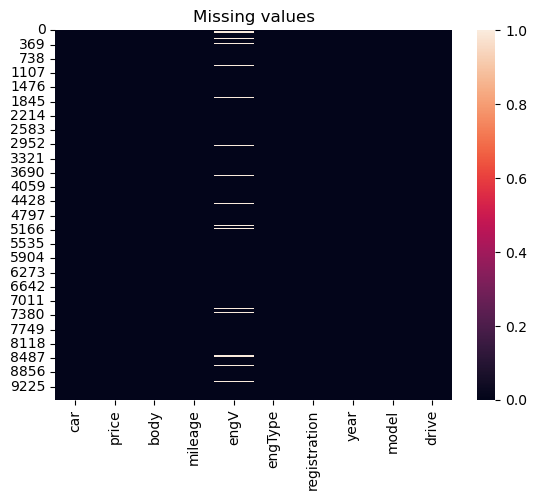

In [8]:
# Visualizing null values
sns.heatmap(df.isnull())
plt.title("Missing values")
plt.show()

In [9]:
df[df.duplicated()]

,car,price,body,mileage,engV,engType,registration,year,model,drive
18,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
42,Mercedes-Benz,20400.0,sedan,190,1.8,Gas,yes,2011,E-Class,rear
70,Mercedes-Benz,0.0,crossover,0,3.0,Diesel,yes,2016,GLE-Class,full
86,Toyota,103999.0,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200,full
98,Mercedes-Benz,20400.0,sedan,190,1.8,Gas,yes,2011,E-Class,rear
...,...,...,...,...,...,...,...,...,...,...
9153,Volkswagen,15700.0,sedan,110,1.8,Petrol,yes,2011,Passat B7,front
9160,Mercedes-Benz,20500.0,sedan,222,5.5,Petrol,yes,2006,S 500,rear
9161,VAZ,3900.0,hatch,121,1.4,Petrol,yes,2008,1119,front
9166,Hyundai,12900.0,crossover,49,2.7,Petrol,yes,2008,Tucson,full


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(9459, 10)

In [12]:
df.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            431
engType           0
registration      0
year              0
model             0
drive             0
dtype: int64

In [13]:
# Unique values in each column
df.nunique()

car               83
price           1352
body               6
mileage          442
engV             117
engType            4
registration       2
year              56
model            859
drive              4
dtype: int64

### Summary Statistics

In [14]:
# Summary stats of numerical features
df.describe()

,price,mileage,engV,year
count,9459.000000,9459.000000,9028.000000,9459.000000
mean,15307.769186,139.947775,2.641272,2006.527751
std,23061.289003,98.479827,5.963324,7.060440
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,129.000000,2.000000,2008.000000
75%,16500.000000,195.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


In [15]:
# summary stats of categorical features
df.describe(include=["object", "bool"])

,car,body,engType,registration,model,drive
count,9459,9459,9459,9459,9459,9459
unique,83,6,4,2,859,4
top,Volkswagen,sedan,Petrol,yes,E-Class,front
freq,927,3622,4340,8898,192,5507


### Feature Engineering

In [16]:
# Creating a new column - car age
df['car_age'] = (datetime.datetime.now().year) - df['year']

In [17]:
df

,car,price,body,mileage,engV,engType,registration,year,model,drive,car_age
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,13
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear,12
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear,15
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front,11
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,rear,10
...,...,...,...,...,...,...,...,...,...,...,...
9567,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front,12
9568,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front,37
9569,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full,15
9570,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front,15


In [18]:
df.rename

<bound method DataFrame.rename of                 car    price       body  mileage  engV engType registration  \
0              Ford  15500.0  crossover       68   2.5     Gas          yes   
1     Mercedes-Benz  20500.0      sedan      173   1.8     Gas          yes   
2     Mercedes-Benz  35000.0      other      135   5.5  Petrol          yes   
3     Mercedes-Benz  17800.0        van      162   1.8  Diesel          yes   
4     Mercedes-Benz  33000.0      vagon       91   NaN   Other          yes   
...             ...      ...        ...      ...   ...     ...          ...   
9567        Hyundai  14500.0  crossover      140   2.0     Gas          yes   
9568     Volkswagen   2200.0      vagon      150   1.6  Petrol          yes   
9569  Mercedes-Benz  18500.0  crossover      180   3.5  Petrol          yes   
9570          Lexus  16999.0      sedan      150   3.5     Gas          yes   
9571           Audi  22500.0      other       71   3.6  Petrol          yes   

      year      m